In [1]:
#-*- coding:utf-8 -*-
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
# LinearSVC 모델
from sklearn.svm import LinearSVC
import numpy as np
import mglearn

Text(0,0.5,'Classifier 1')

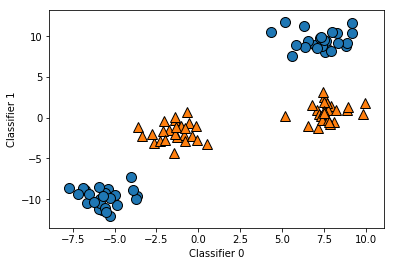

In [2]:
x, y = make_blobs(centers = 4, random_state = 8)
y = y % 2

mglearn.discrete_scatter(x[:,0], x[:,1], y)
plt.xlabel("Classifier 0")
plt.ylabel("Classifier 1")

Text(0,0.5,'Classifier 1')

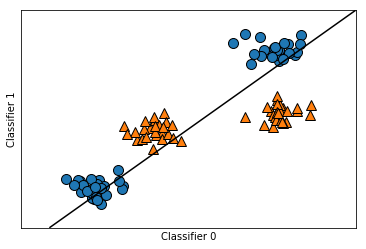

In [3]:
linear_svm = LinearSVC().fit(x, y)

mglearn.plots.plot_2d_separator(linear_svm, x)
mglearn.discrete_scatter(x[:,0], x[:,1], y)
plt.xlabel("Classifier 0")
plt.ylabel("Classifier 1")

Text(0.5,0,'Classifier 1 ** 2')

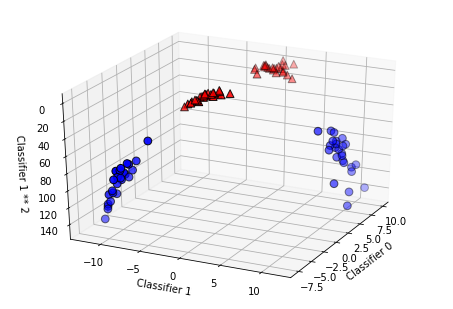

In [4]:
# 커널 서포트 벡터 머신 사용을 위하여
# 두 번째 특성을 제곱하여 추가
x_new = np.hstack([x, x[:, 1:] ** 2])

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()

# 3차원 그래프
ax = Axes3D(figure, elev = -152, azim = -26)

mask = y == 0
ax.scatter(x_new[mask, 0], x_new[mask, 1], x_new[mask, 2], c = 'b',
          cmap = mglearn.cm2, s = 60, edgecolor = 'k')
ax.scatter(x_new[~mask, 0], x_new[~mask, 1], x_new[~mask, 2], c = 'r', marker='^',
          cmap = mglearn.cm2, s = 60, edgecolor = 'k')

ax.set_xlabel("Classifier 0")
ax.set_ylabel("Classifier 1")
ax.set_zlabel("Classifier 1 ** 2")

Text(0.5,0,'Classifier 1 ** 2')

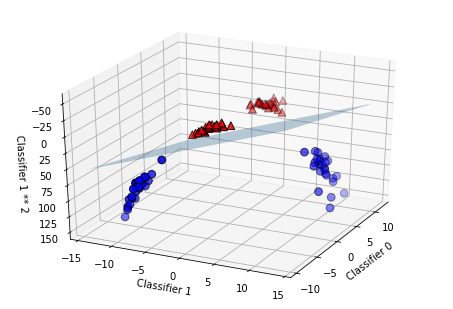

In [5]:
linear_svm_3d = LinearSVC().fit(x_new, y)
coef = linear_svm_3d.coef_.ravel()
intercept = linear_svm_3d.intercept_

# 선형 결정 경계 그리기
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(x_new[:, 0].min() -2, x_new[:, 0].max() +2, 50)
yy = np.linspace(x_new[:, 1].min() -2, x_new[:, 1].max() +2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride = 8, cstride = 8, alpha = 0.3)
ax.scatter(x_new[mask, 0], x_new[mask, 1], x_new[mask, 2], c = 'b',
          cmap = mglearn.cm2, s = 60, edgecolor = 'k')
ax.scatter(x_new[~mask, 0], x_new[~mask, 1], x_new[~mask, 2], c = 'r', marker='^',
          cmap = mglearn.cm2, s = 60, edgecolor = 'k')

ax.set_xlabel("Classifier 0")
ax.set_ylabel("Classifier 1")
ax.set_zlabel("Classifier 1 ** 2")

Text(0,0.5,'Classifier 1')

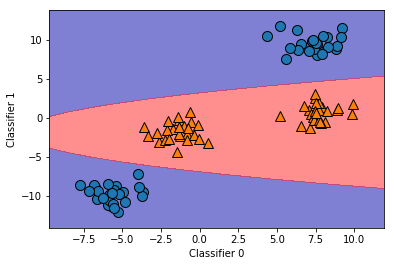

In [6]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
             cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(x[:, 0], x[: ,1], y)
plt.xlabel("Classifier 0")
plt.ylabel("Classifier 1")

Text(0,0.5,'Classifier 1')

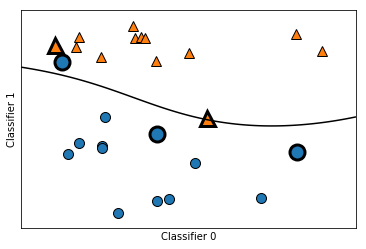

In [7]:
# 서포트 벡터 머신
from sklearn.svm import SVC
x, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(x,y)
mglearn.plots.plot_2d_separator(svm, x, eps=.5)
mglearn.discrete_scatter(x[:,0], x[:,1],y)

# 서포트 벡터
sv = svm.support_vectors_

# dual_coef_의 부호에 의해 서포트 벡터의 클래스 레이블이 결정됨
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Classifier 0")
plt.ylabel("Classifier 1")

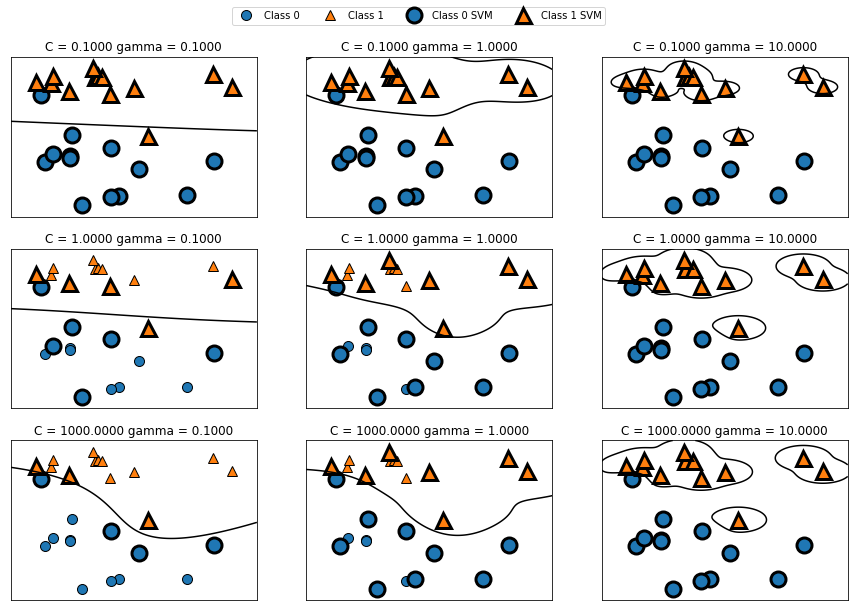

In [8]:
fig, axes = plt.subplots(3, 3, figsize = (15, 10))
for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C = C, log_gamma = gamma, ax = a)

axes[0, 0].legend(["Class 0", "Class 1", "Class 0 SVM", "Class 1 SVM"], ncol=4, loc=(.9, 1.2))

Text(0,0.5,'Classifier Size')

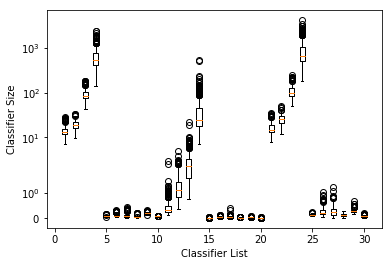

In [9]:
# 유방암 데이터 셋 선언
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)

plt.boxplot(x_train, manage_xticks=False)
plt.yscale("symlog")
plt.xlabel("Classifier List")
plt.ylabel("Classifier Size")

In [10]:
# SVC + cancer dataset

x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

# C = 1, gamma = 1/n_features
svc = SVC()
svc.fit(x_train, y_train)

# 오버피팅
print("훈련 세트 정확도 : {:.3f}".format(svc.score(x_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(svc.score(x_test, y_test)))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.629
